<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [787]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import warnings

print(f'pd: {pd.__version__}')
print(f'np: {np.__version__}')
print(f'plt: {matplotlib.__version__}')
print(f'sns: {sns.__version__}')
print(f'px: {plotly.__version__}')

pd: 2.2.3
np: 2.1.2
plt: 3.9.2
sns: 0.13.2
px: 5.24.1


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [788]:
headhunter_base_df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

In [789]:
display(headhunter_base_df.shape)

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [790]:
headhunter_base_df.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [791]:
headhunter_base_df.info()
display(headhunter_base_df.columns[headhunter_base_df.isna().any()].tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

['Опыт работы',
 'Последнее/нынешнее место работы',
 'Последняя/нынешняя должность']

5. Выведите основную статистическую информацию о столбцах.


In [792]:
display(headhunter_base_df.loc[:, ['Опыт работы']].nunique())
display(headhunter_base_df.loc[:, ['Ищет работу на должность:']].mode())

Опыт работы    44413
dtype: int64

,Ищет работу на должность:
0,Системный администратор


# Копия данных

In [793]:
# Делаем копию, чтобы не ломать основные загруженные данные и не перезагружать их снова, если накосячил
data_df = headhunter_base_df.copy()

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [794]:
data_df['Образование'] = data_df['Образование и ВУЗ'].apply(lambda el: ' '.join(el.lower().split(' ')[0:1 if el.lower().split(' ')[1] == 'образование' else 2]))
data_df = data_df.drop('Образование и ВУЗ', axis=1)
display(data_df['Образование'].value_counts())

Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [795]:
data_df['Пол'] = data_df['Пол, возраст'].apply(lambda el: el.split(',')[0][0].strip().upper())
data_df['Возраст'] = data_df['Пол, возраст'].apply(lambda el: el.split(',')[1].strip().split()[0]).astype('int16')
data_df = data_df.drop('Пол, возраст', axis=1)
display(data_df['Пол'].value_counts(normalize=True) * 100)
display(data_df['Возраст'].mean())

Пол
М    80.929287
Ж    19.070713
Name: proportion, dtype: float64

np.float64(32.19674146254246)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [796]:
def transform_expirience(el):
    if pd.isnull(el) or el == 'Не указано':
        return np.nan
    result = 0
    # Несмотря на описание, где разделитель значений ',' по факту в датасете 
    # разделитель - '  ' (сдвоенный пробел). Сплитуем по нему. Потом разбиваем по пробелам 
    # и отбрасываем первые два элемента ('опыт' и 'работы'). Работаем с реверснутым массивом.
    el = el.lower().split('  ')[0].split()[2:][::-1]
    multiplier = 1
    for v in el:
        if v.startswith(('го', 'ле')):
            # Нашли что-то похожее на год - значит следующее значение - годы стажа, устанавливаем множитель
            multiplier = 12
        elif not v.startswith('ме'):
            # Если строка начинается с "ме", значит месяцы - ничего не делаем 
            # в противном случае у нас цифра, умножаем её на множитель и суммируем с результатом
            result += int(v) * multiplier
    return result

data_df['Опыт работы (месяц)'] = data_df['Опыт работы'].apply(transform_expirience).astype('Int16')
data_df = data_df.drop('Опыт работы', axis=1)

display(data_df[data_df['Опыт работы (месяц)'] != np.nan]['Опыт работы (месяц)'].median())



np.float64(100.0)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [797]:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]

def parse_city(el):
    """
    Разбираем название города
    """
    el = el.split(',')[0].strip()
    if el not in ['Москва', 'Санкт-Петербург']:
        el = 'город-миллионник' if el in million_cities else 'другие'
        
    return el

def parse_relocate(el):
    """
    Разбираем готовность к переезу
    """
    if pd.isnull(el):
        return False

    not_ready = ('не готов',)
    ready = ('готов', 'хочу',)

    el = el.lower().split(' , ')
    el = el[1 if el[1].strip().startswith(not_ready + ready) else 2 ].strip()

    if el.startswith(ready):
        el = True
    elif el.startswith(not_ready):
        el = False

    return el

def parse_trip(el):
    """
    Разбираем готовность к командировкам
    """
    not_ready = ('не готов',)
    ready = ('готов', 'хочу', )

    oel = el
    # el = re.sub(r'\(.*\)', '', el)
    # print(el)

    el = el.lower().split(' , ')[-1]

    if el.startswith(ready):
        el = True
    elif el.startswith(not_ready):
        el = False
    else:
        print(oel, el)
        el=False
    return el

data_df['Город'] = data_df['Город, переезд, командировки'].apply(parse_city)
# display(data_df['Город'].value_counts())

data_df['Готовность к переезду'] = data_df['Город, переезд, командировки'].apply(parse_relocate).astype('bool')
# display(data_df['Готовность к переезду'].value_counts())

data_df['Готовность к командировкам'] = data_df['Город, переезд, командировки'].apply(parse_trip).astype('bool')
# display(data_df['Готовность к командировкам'].value_counts())

data_df = data_df.drop('Город, переезд, командировки', axis=1)

display(data_df['Город'].value_counts(normalize=True) * 100)

display((data_df['Готовность к переезду'] & data_df['Готовность к командировкам']).value_counts(normalize=True) * 100)


Петрозаводск , готов к переезду (Архангельская область, Ленинградская область, Республика Коми, Ненецкий АО, Санкт-Петербург, Псковская область, Мурманская область, Республика Карелия, Новгородская область, Калининградская область, Смоленская область) , г г


Город
Москва              37.146880
другие              35.432684
город-миллионник    16.386555
Санкт-Петербург     11.033882
Name: proportion, dtype: float64

False    67.966655
True     32.033345
Name: proportion, dtype: float64

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [798]:
employments_list =  list(set(x.strip()
    for empl_list in list(map(lambda el: el.split(','), data_df['Занятость'].unique().tolist()))
    for x in empl_list
))

schedules_list =  list(set(x.strip()
    for empl_list in list(map(lambda el: el.split(','), data_df['График'].unique().tolist()))
    for x in empl_list
))

# PEP8 говорит что чем проще - тем лучше, но у меня вышел красивый и быстрый однострочечник. 
# Я не могу с ним расстаться, так как 5 часов упарывался создавая его. Простите меня.
employment_assign_args = dict(map(lambda empl: (empl, lambda df: df['Занятость'].apply(lambda empl_df: empl in [x.strip() for x in empl_df.split(',')])), employments_list))
data_df = data_df.assign(**employment_assign_args)
# То же самое, что и выше
schedules_assign_args = dict(map(lambda sched: (sched, lambda df: df['График'].apply(lambda sched_df: sched in [x.strip() for x in sched_df.split(',')])), schedules_list))
data_df = data_df.assign(**schedules_assign_args)

data_df = data_df.drop(['Занятость', 'График'], axis=1)

display((data_df['проектная работа'] & data_df['волонтерство']).value_counts())
display((data_df['вахтовый метод'] & data_df['гибкий график']).value_counts())


False    44308
True       436
Name: count, dtype: int64

False    42433
True      2311
Name: count, dtype: int64

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [799]:

rouble_rates = pd.read_csv('data/ExchangeRates.csv', sep=',')
rouble_rates['date'] = pd.to_datetime(rouble_rates['date'], format='%d/%m/%y')
rouble_rates = rouble_rates.drop(['per', 'time', 'vol'], axis=1)

currency_table = dict(
    руб=('RUB', 1, 'российский рубль'),
    грн =('UAH', 10, 'гривна'),
    USD =('USD', 1, 'доллар'),
    EUR =('EUR', 1, 'евро'),
    белруб =('BYN', 1, 'белорусский рубль'),
    KGS =('KGS', 10, 'киргизский сом'),
    сум =('UZS', 10000,	'узбекский сум'),
    AZN =('AZN', 1, 'азербайджанский манат'),
    KZT =('KZT', 100, 'казахстанский тенге')
)

df = data_df.copy()
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True)
df['CreationDate'] = pd.to_datetime(df['Обновление резюме'].dt.date)

df['CurrencyISO'] = df['ЗП'].copy()
df['ЗП'] = df['ЗП'].apply(lambda el: int(el.split(' ')[0]))
df['CurrencyISO'] = df['CurrencyISO'].apply(lambda el: currency_table[el.split(' ')[1].replace('.', '').strip()][0])

df = df.merge(rouble_rates, how='left', left_on=['CreationDate', 'CurrencyISO'], right_on=['date', 'currency'], )
# Так как Nan у нас, по идее, только у рублёвых зарплат, то ставим курс и пропорцию в 1
df = df.fillna({'close': 1, 'proportion': 1})
df['ЗП (руб)'] = df['ЗП'] * df['close'] / df['proportion']

df = df.drop(['ЗП', 'CreationDate', 'CurrencyISO', 'currency', 'date', 'close', 'proportion'], axis=1)

display(df['ЗП (руб)'].median())
df.info()
data_df = df.copy()
del df

np.float64(59019.0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44744 non-null  object        
 1   Последнее/нынешнее место работы  44743 non-null  object        
 2   Последняя/нынешняя должность     44742 non-null  object        
 3   Обновление резюме                44744 non-null  datetime64[ns]
 4   Авто                             44744 non-null  object        
 5   Образование                      44744 non-null  object        
 6   Пол                              44744 non-null  object        
 7   Возраст                          44744 non-null  int16         
 8   Опыт работы (месяц)              44574 non-null  Int16         
 9   Город                            44744 non-null  object        
 10  Готовность к переезду            44744 non-null  bool     

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

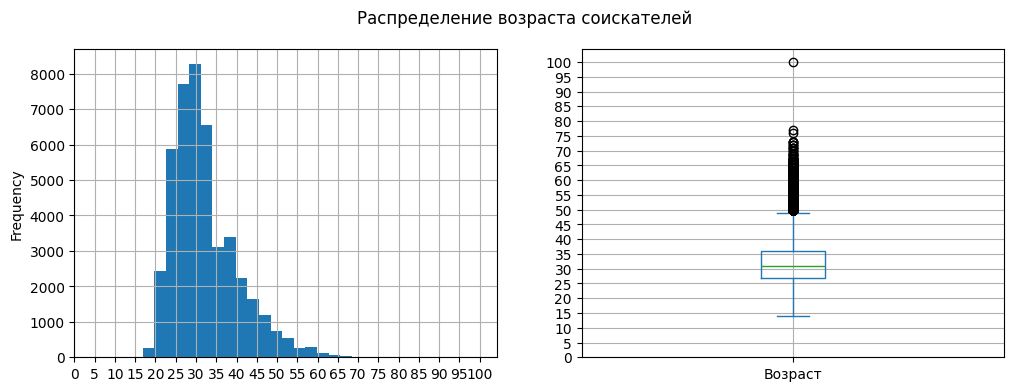

In [800]:
figure, (ax11, ax12) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
figure.suptitle("Распределение возраста соискателей")

data_df['Возраст'].plot(
    kind='hist',
    x='Возраст',
    bins=30,
    xticks=range(0, data_df['Возраст'].max() + 1, 5),
    grid=True,
    ax=ax11,
)

data_df['Возраст'].plot(
    kind='box',
    x='Возраст',
    yticks=range(0, data_df['Возраст'].max() + 1, 5),
    grid=True,
    ax=ax12,
)
plt.show()

> Модальное значение возраста находится в районе 28 лет. Предельные значения 14 и 100 лет. Большиство соискателей в возрасте 27 - 36 лет. Возможная аномалия - 100 лет

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

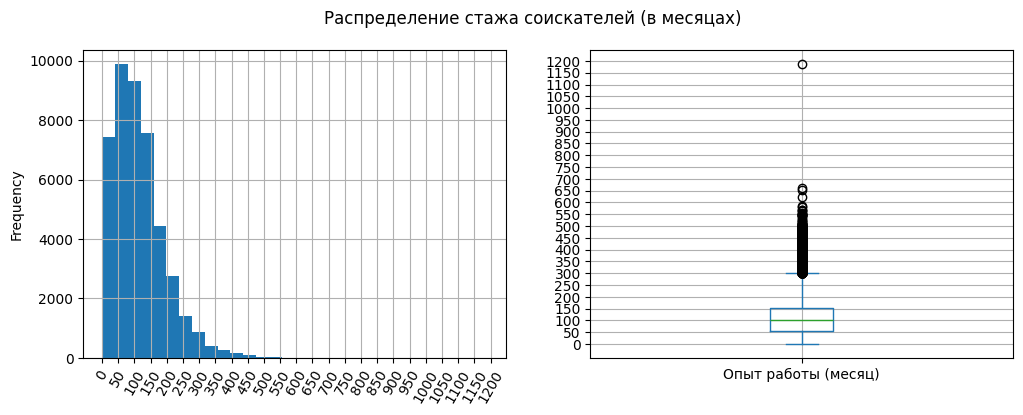

In [801]:
figure, (ax11, ax12) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
figure.suptitle("Распределение стажа соискателей (в месяцах)")

data_df['Опыт работы (месяц)'].plot(
    kind='hist',
    x='Опыт работы (месяц)',
    bins=30,
    xticks=range(0, data_df['Опыт работы (месяц)'].max() + 50, 50),
    grid=True,
    rot=60.0,
    ax=ax11,
)

data_df['Опыт работы (месяц)'].plot(
    kind='box',
    x='Опыт работы (месяц)',
    yticks=range(0, data_df['Опыт работы (месяц)'].max() + 50, 50),
    grid=True,
    ax=ax12,
)
plt.show()

> Модальное значение стажа находится в районе 50 месяцев. Предельные значения 0 и 1180 месяцев. Большиство соискателей имеют стаж 50 - 150 месяцев. Возможная аномалия всё, что свыше 600 месяцев (50 лет)

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


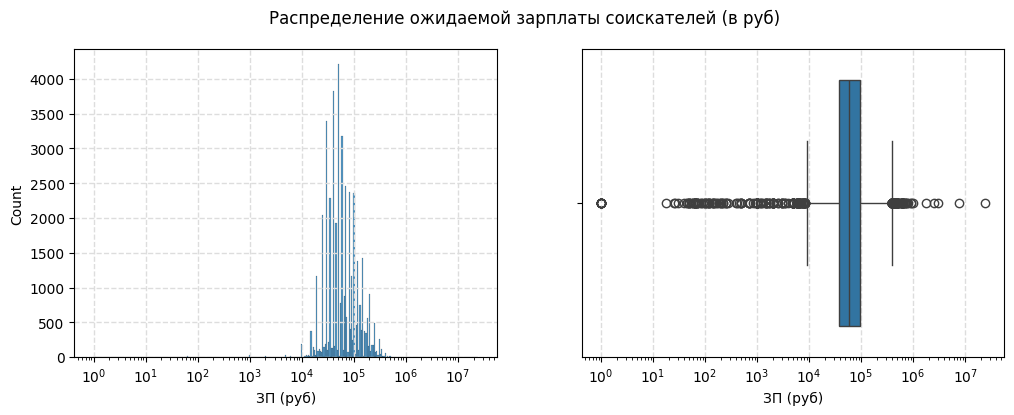

In [802]:
figure, (ax11, ax12) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
figure.suptitle("Распределение ожидаемой зарплаты соискателей (в руб)")

sns.histplot(
    data=data_df,
    x='ЗП (руб)',
    log_scale=True,
    ax=ax11,
)

sns.boxplot(
    data=data_df,
    x='ЗП (руб)',
    orient='h',
    log_scale=True,
    ax=ax12
)

ax11.grid(True, color='#ddd', linestyle='dashed', linewidth=1)
# ax11.grid(False, axis='x')

ax12.grid(True, color='#ddd', linestyle='dashed', linewidth=1)
ax12.grid(False, axis='y')

plt.show()

> Модальное значение желаемой зарплаты находится в районе 50_000 рублей . Предельные значения 1 и 24_304_880 руб. Большиство соискателей хотят от 37 до 95 тысяч рублей. Возможная аномалия - 24_304_880

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

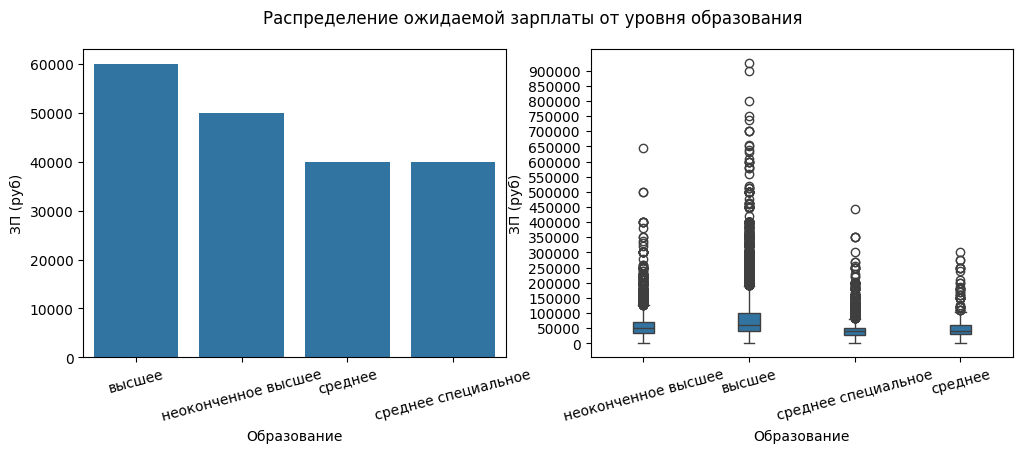

In [803]:
barplot_df = data_df[data_df['ЗП (руб)'] < 1_000_000].groupby(by=['Образование'], as_index=False)['ЗП (руб)'].median()
boxplot_df = data_df[data_df['ЗП (руб)'] < 1_000_000]

figure, (ax11, ax12) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
figure.suptitle("Распределение ожидаемой зарплаты от уровня образования")


sns.barplot(
    data=barplot_df,
    x="Образование", 
    y="ЗП (руб)",
    ax=ax11
)

# sns.histplot(
#     data=boxplot_df,
#     y='ЗП (руб)',
#     x="Образование", 
#     # log_scale=True,
#     ax=ax11,
# )

sns.boxplot(
    data=boxplot_df,
    x='Образование',
    y='ЗП (руб)',
    orient='v',
    width=0.2,
    ax=ax12
)

ax12.set_yticks(ticks=range(0, int(boxplot_df['ЗП (руб)'].max()), 50_000))
plt.setp( ax12.xaxis.get_majorticklabels(), rotation=15) 

plt.setp( ax11.xaxis.get_majorticklabels(), rotation=15) 

plt.show()



> Наибольшая желаемая заработная плата отмечается у людей с высшим образованием, наименьшаа со средним и средне-специальным. Уровень образования вне всякого сомнения влияет на уровень заработной платы

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

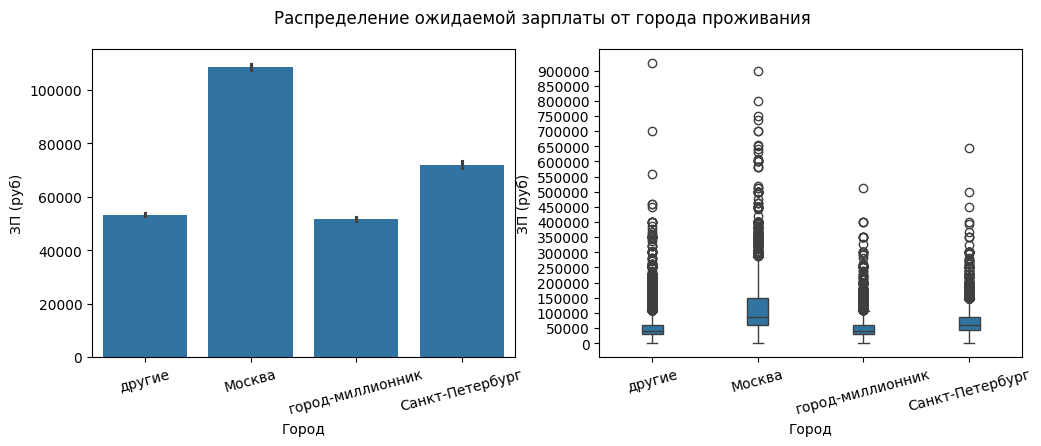

In [804]:
barplot_df = data_df[data_df['ЗП (руб)'] < 1_000_000].groupby(by=['Город'], as_index=False)['ЗП (руб)'].median()
barplot_df = data_df[data_df['ЗП (руб)'] < 1_000_000]


figure, (ax11, ax12) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
figure.suptitle("Распределение ожидаемой зарплаты от города проживания")

sns.barplot(
    data=barplot_df,
    x="Город", 
    y="ЗП (руб)",
    ax=ax11
)

sns.boxplot(
    data=boxplot_df,
    x='Город',
    y='ЗП (руб)',
    orient='v',
    width=0.2,
    ax=ax12
)

ax12.set_yticks(ticks=range(0, int(boxplot_df['ЗП (руб)'].max()), 50_000))
plt.setp( ax12.xaxis.get_majorticklabels(), rotation=15) 

plt.setp( ax11.xaxis.get_majorticklabels(), rotation=15) 

plt.show()

> В Москве самые высокие ожидания зарплаты, так же как и самый большой размах. Признак города важен при учёте заработной платы

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

,Готовность к переезду,Готовность к командировкам,ЗП (руб)
0,False,False,40000.0
1,False,True,60000.0
2,True,False,50000.0
3,True,True,67000.0


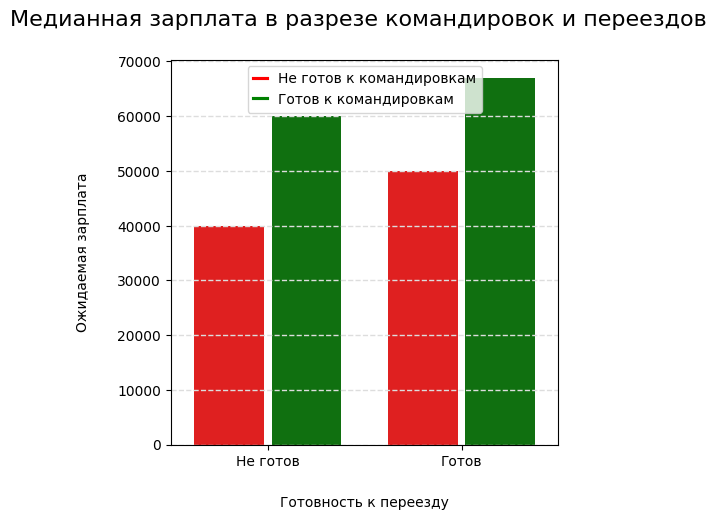

In [805]:
plot_data_grp = data_df[data_df['ЗП (руб)'] < 1_000_000].groupby(by=['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()

figure, ax11, = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
figure.suptitle('Медианная зарплата в разрезе командировок и переездов', fontsize=16)

sns.barplot(
    data=plot_data_grp,
    x="Готовность к переезду", 
    y="ЗП (руб)", 
    hue="Готовность к командировкам", 
    palette=['r', 'g'],
    gap=.1,
    ax=ax11,
)

ax11.grid(True, color='#ddd', linestyle='dashed', linewidth=1)
ax11.grid(False, axis='x')
ax11.set_ylabel('Ожидаемая зарплата');
ax11.yaxis.labelpad=20
ax11.xaxis.labelpad=20

ax11.set_xticks(ticks=[True, False], labels=('Готов', 'Не готов'));

legend_labels = ('Готов к командировкам', 'Не готов к командировкам')
a, b = legend_labels if ax11.get_legend_handles_labels()[0] == True else legend_labels[::-1]
legend = ax11.legend(
    [a, b],
    # bbox_to_anchor = (0.5, 1.15),
    title="",
    loc='upper center',
    handlelength=1.0,
    handleheight=1.0,
    )
lines = legend.get_lines()
lines[0].set_color("r")
lines[1].set_color("g")

display(plot_data_grp)

plt.show()


Выводы

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Образование,высшее,неоконченное высшее,среднее,среднее специальное
Возраст,,,,
14,60000.00,NaN,NaN,NaN
15,NaN,NaN,10000.0,2000.0
16,122582.49,NaN,NaN,30000.0
17,90075.50,80000.0,44000.0,25000.0
18,30000.00,25000.0,35000.0,25151.0
...,...,...,...,...
72,75000.00,NaN,NaN,NaN
73,62500.00,NaN,NaN,NaN
76,45000.00,NaN,NaN,NaN


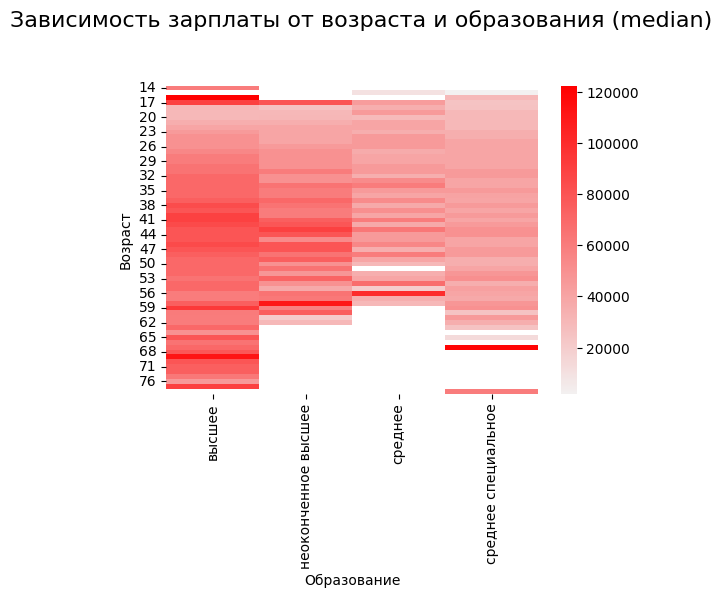

In [806]:
# plot_data_grp = data_df[data_df['ЗП (руб)'] < 1_000_000].groupby(by=['Возраст', 'Образование'], as_index=False)['ЗП (руб)'].median()

data_pivot = data_df.pivot_table(
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    aggfunc='median',
    observed=True
)

# display(plot_data_grp)
display(data_pivot)


figure, ax11 = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
figure.suptitle('Зависимость зарплаты от возраста и образования (median)', fontsize=16, ha='center', x=0.45, y=1.07)

sns.heatmap(
    data=data_pivot, 
    cmap=sns.color_palette("light:red", as_cmap=True),
    ax=ax11,
)


plt.show()

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [807]:
figure = px.scatter(data_df, x="Опыт работы (месяц)", y="Возраст", title="Зависимость опыта работы от возраста")

cat_line = figure.add_shape(
    type="line",
    x0=0, 
    y0=0, 
    x1=1200, 
    y1=100,
    opacity=0.3,
    layer='below',
    line={
        'color': 'red',
        'dash': 'solid',
    }
)

cat_line.update_layout(
    showlegend=True,
    legend=dict( 
        orientation="h", 
        x=0,
        y=0,
    )
) 

figure.show()

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [808]:
display(data_df.duplicated().value_counts())
data_df = data_df.drop_duplicates().reindex()

False    44586
True       158
Name: count, dtype: int64

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [809]:
def display_nan_info(df):
    cols_null_count = df.isnull().sum()
    cols_null_percent = df.isnull().mean() * 100
    
    cols_with_null_count_sign = cols_null_count[cols_null_count > 0].sort_values(ascending=False)
    cols_with_null_percent_sign = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
    
    display(cols_with_null_count_sign)
    display(cols_with_null_percent_sign)

display_nan_info(data_df)

Опыт работы (месяц)                168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

Опыт работы (месяц)                0.376800
Последняя/нынешняя должность       0.004486
Последнее/нынешнее место работы    0.002243
dtype: float64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [810]:
data_df = data_df.dropna(subset=['Последняя/нынешняя должность', 'Последнее/нынешнее место работы'])
data_df['Опыт работы (месяц)'] = data_df['Опыт работы (месяц)'].fillna(value=data_df['Опыт работы (месяц)'].median())

display_nan_info(data_df)

display(data_df['Опыт работы (месяц)'].mean())

Series([], dtype: int64)

Series([], dtype: float64)

np.float64(114.35831239906693)

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [811]:
mask_lt = data_df['ЗП (руб)'] < 1_000
mask_gt = data_df['ЗП (руб)'] > 1_000_000

display(len(data_df[mask_lt | mask_gt].index))

data_df = data_df.drop(data_df[mask_lt | mask_gt].index).reindex()

89

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [812]:
mask_resume = data_df['Опыт работы (месяц)'] // 12 >= data_df['Возраст']

display(len(data_df[mask_resume].index))

data_df = data_df.drop(data_df[mask_resume].index).reindex()

7

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [813]:
def outliers_sigma_mod(data, feature=None, log_scale=False, ignore_zeroes=False,  left:int=3, right:int=3) -> tuple:
    """
    Возвращает список неинформативных признаков по методу сигм и очищенный результат

    Returns:
        - outliers, cleaned
    """
    elements = data[feature] if feature else data
    if log_scale:
        val: pd.DataFrame = np.log(elements + (0 if ignore_zeroes else 1)) # +1 нужен для обработки нулевых значений
    else:
        val: pd.DataFrame = elements
    mu = val.mean()
    sigma = val.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    # print(mu, sigma, lower_bound, upper_bound)
    outliers = data[(val < lower_bound) | (val > upper_bound)]
    cleaned = data[(val >= lower_bound) & (val <= upper_bound)]
    return outliers, cleaned

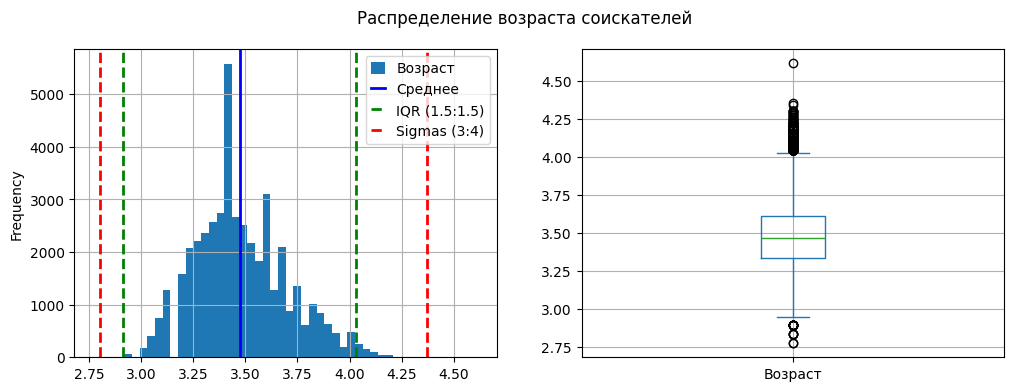

In [814]:
figure, (ax11, ax12) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
figure.suptitle("Распределение возраста соискателей")

df = np.log(data_df['Возраст'] + 1)

df.plot(
    kind='hist',
    x='Возраст',
    bins=50,
    # xticks=range(int(df.min()), int(df.max()), 10),
    grid=True,
    # logy=True,
    # logx=True,
    ax=ax11,
)

left_irq, right_irq = 1.5, 1.5
left_sigma, right_sigma = 3, 4
quartile_1, quartile_3 = df.quantile(0.25), df.quantile(0.75),
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * left_irq)
upper_bound = quartile_3 + (iqr * right_irq)
ax11.axvline(df.mean(), color='b', lw=2)
# Limits for irq method
ax11.axvline(lower_bound, color='g', ls='--', lw=2)
ax11.axvline(upper_bound, color='g', ls='--', lw=2)
# Limits for 3-sigmas method
ax11.axvline(df.mean() + right_sigma * df.std(), color='r', ls='--', lw=2)
ax11.axvline(df.mean() - left_sigma * df.std(), color='r', ls='--', lw=2)

legend_labels = ('Возраст', 'Среднее', f'IQR ({left_irq}:{right_irq})', f'Sigmas ({left_sigma}:{right_sigma})')
legend = ax11.legend(
    legend_labels,
    # bbox_to_anchor = (0.5, 1.15),
    title="",
    loc='upper right',
    handlelength=1.0,
    handleheight=1.0,
    )
lines = legend.get_lines()
lines[1].set_color("g")
lines[2].set_color("r")

df.plot(
    kind='box',
    x='Возраст',
    # yticks=range(int(df.min()), int(df.max()), 5),
    grid=True,
    ax=ax12,
)
plt.show()

Лог-распределение ассиметрично с сильным уходом вправо.

In [815]:
outliers, cleaned = outliers_sigma_mod(data_df, feature='Возраст', log_scale=True, left=left_sigma, right=right_sigma)
display(outliers.shape)
data_df = cleaned

(3, 23)